##**BD분석 방법론_2023**
                                                  담당교수: 염동호
                                                  
* 제출기한: 2023년 4월 28일(23시59분)
* 이름: 김석규                                     
* 학과: 정보통신학부

### **미션_1: 대여 자전거 데이터 전처리**
* 데이터: bicycle 대여대수와 기상 데이터셋.
* 조건: **데이터 분석이 불필요한 데이터 삭제는 3개 이내로 한정 할 것**

### **미션_2 : 타이타닉 데이터 전처리**
* 데이터: 타이타닉 생존자 데이터셋
* 조건: **데이터 분석이 불필요한 데이터 삭제는 3개 이내로 한정 할 것**

##**-------------------------------**

# **1. 미션_1**

## **1.1 라이브러리 및 데이터**

### 1.1.1 Library & Data
* 데이터분석에 필요한 라이브러리를 가져온다
* 분석할 데이터를 불러온다.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl                           # 기본적인 데이터 시각화 라이브러리(matplotlib) 설치
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

* 데이터로드_1

In [4]:
# 엑셀파일의 경우 pd.read_excel('/..........xlsx')
data = pd.read_csv('C:/Users/user/Downloads/bicycle_1.csv')

###1.1.2 **데이터 확인**

In [ ]:
data.head(2) 

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,1,20,16.3,1,1.5,89.0,576.0,0.027,76.0,33.0,49
1,2,13,20.1,0,1.4,48.0,916.0,0.042,73.0,40.0,159


In [9]:
data.describe().round(2)

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
count,2000.00,2000.00,1985.00,2000.00,1984.00,1991.00,1987.00,1896.00,1890.00,1866.00,2000.00
mean,1000.50,11.55,18.51,0.04,2.47,53.37,1394.51,0.04,57.88,30.53,108.22
std,577.49,6.94,5.73,0.20,1.37,20.37,591.50,0.02,31.91,14.63,83.78
min,1.00,0.00,3.10,0.00,0.00,7.00,78.00,0.00,12.00,9.00,1.00
25%,500.75,6.00,14.20,0.00,1.40,37.00,857.00,0.02,36.00,20.00,37.00
50%,1000.50,12.00,18.60,0.00,2.30,52.00,1565.00,0.04,52.00,26.00,95.50
75%,1500.25,18.00,22.60,0.00,3.40,70.00,1996.00,0.05,70.00,37.00,149.00
max,2000.00,23.00,33.80,1.00,12.00,100.00,2000.00,0.12,269.00,90.00,431.00


**Description**
* id : 날짜와 시간별 id
* hour : 시간
* temperature : 1시간 전 기온pm10
* precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 1시간 전 평균풍속
* humidity : 1시간 전 습도
* visibility : 1시간 전 시계
* ozone : 1시간 전 오존상태
* pm10 : 1시간 전 미세먼지(머리카락 1/5~1/7 크기)
* pm2.5 : 1시간 전 미세먼지(머리카락 1/20~ 1/30 크기)
* count : 1시간 후 자전거 대여 대수

**1.2 데이터 전처리**

In [7]:
data.shape

(2000, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   hour           2000 non-null   int64  
 2   temperature    1985 non-null   float64
 3   precipitation  2000 non-null   int64  
 4   windspeed      1984 non-null   float64
 5   humidity       1991 non-null   float64
 6   visibility     1987 non-null   float64
 7   ozone          1896 non-null   float64
 8   pm10           1890 non-null   float64
 9   pm2.5          1866 non-null   float64
 10  count          2000 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 172.0 KB


In [13]:
data['pm10'].median()

52.0

In [14]:
data.groupby('pm10').mean().round(2)

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm2.5,count
pm10,,,,,,,,,,
12.0,894.00,7.50,14.85,0.0,1.15,54.00,1419.00,0.03,13.0,57.50
13.0,568.00,5.00,14.65,0.0,3.35,44.50,1535.00,0.04,9.0,27.00
14.0,11.00,4.00,5.70,0.0,0.60,77.00,1960.00,0.03,18.0,6.00
16.0,626.00,9.00,6.60,0.0,1.70,71.00,1871.00,0.02,16.0,52.00
17.0,678.83,8.83,14.18,0.0,1.88,51.67,1524.00,0.04,10.6,116.33
...,...,...,...,...,...,...,...,...,...,...
214.0,1802.00,4.33,22.10,0.0,1.73,68.00,969.33,0.03,21.0,137.67
220.0,1798.00,13.00,25.93,0.0,2.27,40.67,1806.33,0.07,51.0,208.00
223.0,618.00,4.00,12.30,0.0,2.80,22.00,1082.00,0.04,20.0,16.00


In [15]:
data.groupby('pm10').mean()['count']

pm10
12.0      57.500000
13.0      27.000000
14.0       6.000000
16.0      52.000000
17.0     116.333333
            ...    
214.0    137.666667
220.0    208.000000
223.0     16.000000
237.0     46.000000
269.0     58.500000
Name: count, Length: 131, dtype: float64

## **1.3 저장**

## **1.4 결과 정리 및 인사이트**

<AxesSubplot:xlabel='pm10'>

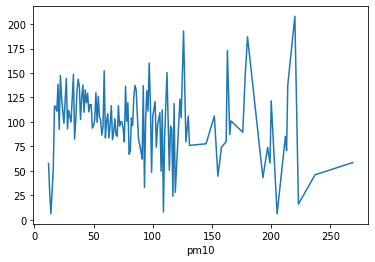

In [16]:
data.groupby('pm10').mean()['count'].plot()

In [18]:
sum = data.groupby('pm10')['windspeed', 'humidity', 'count'].sum().reset_index()   

In [19]:
print(sum)

      pm10  windspeed  humidity  count
0     12.0        2.3     108.0    115
1     13.0        6.7      89.0     54
2     14.0        0.6      77.0      6
3     16.0        1.7      71.0     52
4     17.0       11.3     310.0    698
..     ...        ...       ...    ...
126  214.0        5.2     204.0    413
127  220.0        6.8     122.0    624
128  223.0        2.8      22.0     16
129  237.0        5.4     142.0     92
130  269.0        9.0      61.0    117

[131 rows x 4 columns]


<AxesSubplot:xlabel='pm10'>

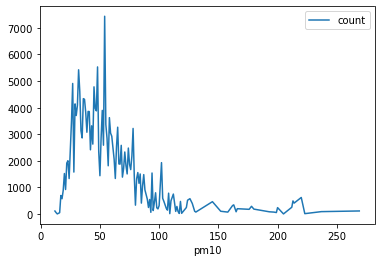

In [20]:
sum.plot('pm10', 'count')

# **2. 미션_2**

## **2.1 라이브러리 및 데이터**

### **2.1.1 Library & Data**

In [21]:
import numpy as np
import pandas as pd

import matplotlib as mpl                           # 기본적인 데이터 시각화 라이브러리(matplotlib) 설치
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings
warnings.filterwarnings("ignore")

* 데이터로드_1

In [23]:
# 엑셀파일의 경우 pd.read_excel('/..........xlsx')
data = pd.read_csv('C:/Users/user/Downloads/titanic.csv')

### **2.1.2 데이터 확인**

**Description**
* Passenger Id: 승객 아이디
* Survived: 생존 여부(1: 생존, 0: 사망)
* Pclass: 객실등급(1: 1등급, 2:2등급, 3:3등급), 사회경제적 지위를 대리함.
* Name: 이름
* Sex: 성별
* Age: 나이
* SibSp: 형제, 자매, 배우자 수(동승자)
* Parch: 부모, 자식 수(동승자)
* Ticket: 티켓번호
* Fare: 티켓요금
* Cabin: 객실번호
* Embarked: 탑승한 항구(C = Cherbourg 셰르브루, Q = Queenstown 퀸즈타운, S = Southampton 샤우샘프턴)

In [24]:
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0,NaN,S,NaN,"Cornwall / Akron, OH"


## **2.2 데이터 전처리**

In [26]:
data.describe().round(2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1309.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.29,160.81
std,0.84,0.49,14.41,1.04,0.87,51.74,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [31]:
train = data.drop(['name', 'ticket', 'cabin'], axis = 1)

In [32]:
train.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body,home.dest
0,2,1,female,13.0,0,1,19.5,S,NaN,"England / Bennington, VT"
1,2,1,female,4.0,1,1,23.0,S,NaN,"Cornwall / Akron, OH"


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   fare       1309 non-null   float64
 7   embarked   1307 non-null   object 
 8   body       121 non-null    float64
 9   home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [44]:
%%time
train.groupby('sex').mean().round(2)

Wall time: 4.97 ms


,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.15,0.73,28.89,0.65,0.63,46.20,166.62
male,2.37,0.19,30.43,0.41,0.25,26.15,160.40


<AxesSubplot:xlabel='sex'>

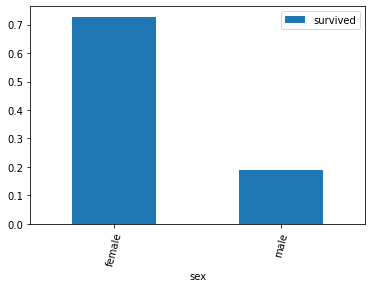

In [45]:
train[['sex', 'survived']].groupby('sex').mean().plot(kind = "bar", rot = 75) 

## **2.3 저장**

male      843
female    466
Name: sex, dtype: int64


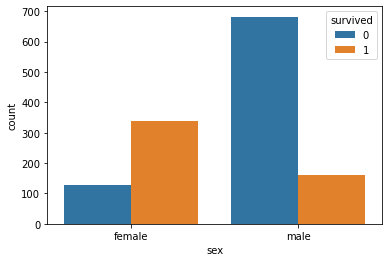

In [51]:
print(train['sex'].value_counts())
difference= sns.countplot(x='sex', hue = 'survived',  data = train)

## **2.3 결과 정리 및 인사이트**

In [50]:
pd.crosstab(train.sex,train.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


#**굿럭!!!**